# Objectif du script

L'objectif de ce script est d'analyser les évolutions des prix de 2016 à 2021 pour dégager des tendances. Il sera aussi étudier les évolutions de prix pour l'année 2022 en intégrant l'aspect temporel. 

Nous utiliserons le module Facebook Prohet principalement. 

Les bases de données DVF se trouvent à l'adresse suivante : https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/

Nous conseillons de les télécharger localement car la volumétrie ne permets pas le stockage sous Github.

# Evolution des prix de 2016 à 2021 et prévisions pour 2022

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [3]:
year_min = 2016
year_max = 2021

### 1 - Import des bases de 2016 à 2021, avec features engineering

In [4]:
# Chargement du jeu de données
df = pd.DataFrame()
df_temp = pd.read_csv("valeursfoncieres-2016-s2.txt", sep = "|",decimal = ",")
df = pd.concat([df, df_temp])
df_temp = pd.read_csv("valeursfoncieres-2017.txt", sep = "|",decimal = ",")
df = pd.concat([df, df_temp])
df_temp = pd.read_csv("valeursfoncieres-2018.txt", sep = "|",decimal = ",")
df = pd.concat([df, df_temp])
df_temp = pd.read_csv("valeursfoncieres-2019.txt", sep = "|",decimal = ",")
df = pd.concat([df, df_temp])
df_temp = pd.read_csv("valeursfoncieres-2020.txt", sep = "|",decimal = ",")
df = pd.concat([df, df_temp])
df_temp = pd.read_csv("valeursfoncieres-2021-s1.txt", sep = "|",decimal = ",")
df = pd.concat([df, df_temp])



/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (18,23,24,26,28,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (18,23,24,26,28,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (18,23,24,26,28,32,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (18,23,24,26,28,30,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has

In [6]:
df = df[(df["Type local"] == "Appartement") | (df["Type local"] == "Maison")]
df = df[df["Nature mutation"] == "Vente"]
df.shape

(5826850, 43)

In [7]:
# Colonnes inutiles
df.drop(["Code service CH","Reference document","1 Articles CGI",
              "2 Articles CGI","3 Articles CGI","4 Articles CGI",
              "5 Articles CGI"], axis = 1, inplace = True)

# Suppression des lignes dublons
df.drop_duplicates(subset = None, inplace = True)
df = df.drop_duplicates(subset = ["Date mutation","Valeur fonciere","Code postal"], keep = False)
df.shape

(3774420, 36)

In [8]:
df['Code departement'] = df['Code departement'].apply(lambda x: str(x).zfill(2) if len(str(x)) == 1 else x)
df['Code commune'] = df['Code commune'].apply(lambda x: str(x).zfill(3) if len(str(x)) < 3 else x)
df['Code postal'] = df['Code departement'].astype(str) + df['Code commune'].astype(str)
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
3,2,06/07/2016,Vente,156500.0,1348.0,NaN,CHEM,0356,DU PETIT CORGENON,01065,BUELLAS,01,065,NaN,B,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,94.0,4.0,S,NaN,1013.0
4,1,06/07/2016,Vente,212000.0,340.0,NaN,CHE,0463,DES SOURCES,01374,SAINT-MARTIN-DU-MONT,01,374,NaN,G,1832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,100.0,4.0,S,NaN,1000.0
6,1,05/07/2016,Vente,157750.0,5444.0,NaN,NaN,B009,LES CADALES,01069,CERTINES,01,069,NaN,ZD,380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,105.0,5.0,S,NaN,806.0
8,1,07/07/2016,Vente,210000.0,25.0,NaN,RUE,0415,SAMUEL GUICHENON,01072,CEYZERIAT,01,072,NaN,A,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,93.0,4.0,S,NaN,726.0
9,1,04/07/2016,Vente,111700.0,30.0,NaN,AV,1970,JEAN JAURES,01053,BOURG-EN-BRESSE,01,053,NaN,AM,38,NaN,16,9.79,17.0,NaN,6.0,2.71,61.0,NaN,NaN,NaN,4,2.0,Appartement,NaN,79.0,2.0,NaN,NaN,NaN


In [9]:
df["Prix m2"] = df["Valeur fonciere"] / df["Surface reelle bati"]
df["Paris"] = df["Code departement"].apply(lambda x : 1 if x == 75 else 0)
Paris = df[df["Paris"] == 1]
Autre_villes = df[df["Paris"] == 0]
Paris.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Prix m2,Paris
1584954,1,05/07/2016,Vente,822000.0,17.0,NaN,RUE,1771,CHAPON,75103,PARIS 03,75,103,NaN,AS,46,NaN,42,77.49,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,70.0,3.0,NaN,NaN,NaN,11742.857143,1
1584955,1,01/07/2016,Vente,1040000.0,27.0,NaN,RUE,7237,DE PENTHIEVRE,75108,PARIS 08,75,108,NaN,BK,36,NaN,23,99.01,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,97.0,5.0,NaN,NaN,NaN,10721.649485,1
1584958,1,06/07/2016,Vente,612500.0,2.0,NaN,RUE,9470,TRONCHET,75108,PARIS 08,75,108,NaN,BS,106,NaN,1,NaN,44.0,114.11,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,128.0,5.0,NaN,NaN,NaN,4785.156250,1
1584961,1,08/07/2016,Vente,1315400.0,203.0,NaN,RUE,8694,SAINT MARTIN,75103,PARIS 03,75,103,NaN,AV,127,NaN,15,137.40,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,140.0,4.0,NaN,NaN,NaN,9395.714286,1
1584963,1,05/07/2016,Vente,2900000.0,22.0,NaN,RUE,0779,BEAUJON,75108,PARIS 08,75,108,NaN,AX,94,NaN,3,NaN,33.0,287.06,68.0,NaN,NaN,NaN,NaN,NaN,3,2.0,Appartement,NaN,301.0,7.0,NaN,NaN,NaN,9634.551495,1


In [10]:
# Gestion des valeurs abberantes Paris
outliers_max_Paris = Paris["Valeur fonciere"].quantile(0.97)
outliers_min_Paris = Paris["Valeur fonciere"].quantile(0.05)
outliers_max_Paris_surface = Paris["Surface reelle bati"].quantile(0.99)
outliers_min_Paris_surface = Paris["Surface reelle bati"].quantile(0.01)
outliers_max_Paris_prix_m2= Paris["Prix m2"].quantile(0.98)
outliers_min_Paris_prix_m2 = Paris["Prix m2"].quantile(0.1)

Paris = Paris[(Paris["Valeur fonciere"] < outliers_max_Paris) & 
              (Paris["Valeur fonciere"] > outliers_min_Paris) &
              (Paris["Surface reelle bati"] < outliers_max_Paris_surface) &
              (Paris["Surface reelle bati"] > outliers_min_Paris_surface) &
              (Paris["Prix m2"] < outliers_max_Paris_prix_m2) &
              (Paris["Prix m2"] > outliers_min_Paris_prix_m2) ]

print(outliers_max_Paris)
print(outliers_min_Paris)
print(outliers_max_Paris_surface)
print(outliers_min_Paris_surface)
print(outliers_max_Paris_prix_m2)
print(outliers_min_Paris_prix_m2)

del outliers_max_Paris, outliers_min_Paris, outliers_max_Paris_surface, outliers_min_Paris_surface
del outliers_max_Paris_prix_m2, outliers_min_Paris_prix_m2

1850000.0
100000.0
210.0
9.0
19000.0
6269.841269841269


In [11]:
# Gestion des valeurs abberantes des villes autre que Paris
outliers_max_Autre_villes = Autre_villes["Valeur fonciere"].quantile(0.996)
outliers_min_Autre_villes = Autre_villes["Valeur fonciere"].quantile(0.05)
outliers_max_Autre_villes_surface = Autre_villes["Surface reelle bati"].quantile(0.999)
outliers_min_Autre_villes_surface = Autre_villes["Surface reelle bati"].quantile(0.0005)
outliers_max_Autre_villes_prix_m2= Autre_villes["Prix m2"].quantile(0.998)
outliers_min_Autre_villes_prix_m2 = Autre_villes["Prix m2"].quantile(0.125)

Autre_villes = Autre_villes[(Autre_villes["Valeur fonciere"] < outliers_max_Autre_villes) & 
              (Autre_villes["Valeur fonciere"] > outliers_min_Autre_villes) &
              (Autre_villes["Surface reelle bati"] < outliers_max_Autre_villes_surface) &
              (Autre_villes["Surface reelle bati"] > outliers_min_Autre_villes_surface) &
              (Autre_villes["Prix m2"] < outliers_max_Autre_villes_prix_m2) &
              (Autre_villes["Prix m2"] > outliers_min_Autre_villes_prix_m2) ]

print(outliers_max_Autre_villes)
print(outliers_min_Autre_villes)
print(outliers_max_Autre_villes_surface)
print(outliers_min_Autre_villes_surface)
print(outliers_max_Autre_villes_prix_m2)
print(outliers_min_Autre_villes_prix_m2)

del outliers_max_Autre_villes, outliers_min_Autre_villes, outliers_max_Autre_villes_surface
del outliers_min_Autre_villes_surface, outliers_max_Autre_villes_prix_m2, outliers_min_Autre_villes_prix_m2

1146980.8000000194
40000.0
330.0
10.0
14358.739166666637
973.4513274336283


In [12]:
df_clean = pd.concat([Paris,Autre_villes], axis = 0)
del Paris, Autre_villes
df_clean.shape

(3240834, 38)

In [13]:
df_clean['month_year'] = pd.to_datetime(df_clean['Date mutation']).dt.to_period('M')
df_clean.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Prix m2,Paris,month_year
1584954,1,05/07/2016,Vente,822000.0,17.0,NaN,RUE,1771,CHAPON,75103,PARIS 03,75,103,NaN,AS,46,NaN,42,77.49,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,70.0,3.0,NaN,NaN,NaN,11742.857143,1,2016-05
1584955,1,01/07/2016,Vente,1040000.0,27.0,NaN,RUE,7237,DE PENTHIEVRE,75108,PARIS 08,75,108,NaN,BK,36,NaN,23,99.01,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,97.0,5.0,NaN,NaN,NaN,10721.649485,1,2016-01
1584961,1,08/07/2016,Vente,1315400.0,203.0,NaN,RUE,8694,SAINT MARTIN,75103,PARIS 03,75,103,NaN,AV,127,NaN,15,137.40,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,140.0,4.0,NaN,NaN,NaN,9395.714286,1,2016-08
1584966,1,01/07/2016,Vente,415000.0,10.0,NaN,RUE,8009,RAMBUTEAU,75103,PARIS 03,75,103,NaN,AT,72,NaN,10,46.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,40.0,3.0,NaN,NaN,NaN,10375.000000,1,2016-01
1584968,1,04/07/2016,Vente,390000.0,9.0,NaN,NaN,9936,VIL WAGRAM SAINT HONORE,75108,PARIS 08,75,108,NaN,AX,36,NaN,1,30.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,52.0,1.0,NaN,NaN,NaN,7500.000000,1,2016-04


In [14]:
#df_clean['ds'] = df_clean['Date mutation'].apply(lambda x: str(x)[3:5] + "/01/" + str(x)[6:10])
#df_clean.head()

df_clean['ds']=df_clean['Date mutation']
df_clean.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Prix m2,Paris,month_year,ds
1584954,1,05/07/2016,Vente,822000.0,17.0,NaN,RUE,1771,CHAPON,75103,PARIS 03,75,103,NaN,AS,46,NaN,42,77.49,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,70.0,3.0,NaN,NaN,NaN,11742.857143,1,2016-05,05/07/2016
1584955,1,01/07/2016,Vente,1040000.0,27.0,NaN,RUE,7237,DE PENTHIEVRE,75108,PARIS 08,75,108,NaN,BK,36,NaN,23,99.01,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,97.0,5.0,NaN,NaN,NaN,10721.649485,1,2016-01,01/07/2016
1584961,1,08/07/2016,Vente,1315400.0,203.0,NaN,RUE,8694,SAINT MARTIN,75103,PARIS 03,75,103,NaN,AV,127,NaN,15,137.40,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,140.0,4.0,NaN,NaN,NaN,9395.714286,1,2016-08,08/07/2016
1584966,1,01/07/2016,Vente,415000.0,10.0,NaN,RUE,8009,RAMBUTEAU,75103,PARIS 03,75,103,NaN,AT,72,NaN,10,46.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,40.0,3.0,NaN,NaN,NaN,10375.000000,1,2016-01,01/07/2016
1584968,1,04/07/2016,Vente,390000.0,9.0,NaN,NaN,9936,VIL WAGRAM SAINT HONORE,75108,PARIS 08,75,108,NaN,AX,36,NaN,1,30.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,52.0,1.0,NaN,NaN,NaN,7500.000000,1,2016-04,04/07/2016


In [15]:
# Prix m² / commune
prix_m2_commune = df_clean.groupby(['Code postal', 'Type local', 'ds'])['Prix m2'].median().reset_index()

# Prix m² / département
prix_m2_dep = df_clean.groupby(['Code departement', 'Type local', 'ds'])['Prix m2'].median().reset_index()

# Prix m² / france
prix_m2_france = df_clean.groupby(['Type local', 'ds'])['Prix m2'].median().reset_index()

In [16]:
prix_m2_france.head()

,Type local,ds,Prix m2
0,Appartement,01/01/2017,2664.285714
1,Appartement,01/01/2019,2810.584475
2,Appartement,01/01/2020,2545.267803
3,Appartement,01/01/2021,2434.782609
4,Appartement,01/02/2017,2892.308824


### 2 -  Premières prévisions en utilisant le module Facebook Prophet - analyse de tendances

In [14]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [15]:
import matplotlib.pyplot as plt

(1724, 3)


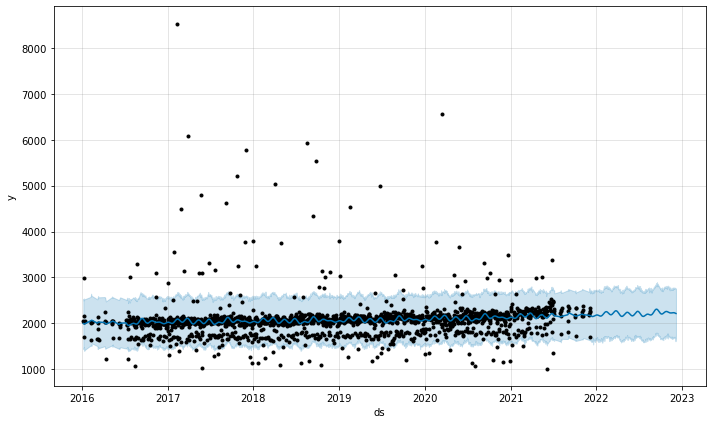

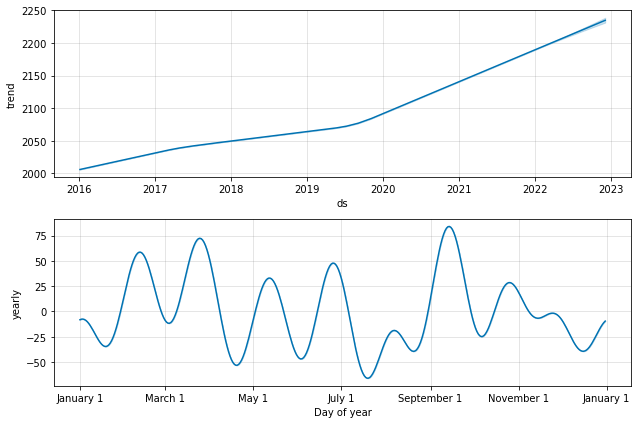

In [86]:
data_maison = prix_m2_france[prix_m2_france['Type local'] == "Maison"]
data_maison = data_maison.rename(columns={"Prix m2": 'y'})

print(data_maison.shape)

data_maison.head()


m = Prophet(daily_seasonality=False,weekly_seasonality= False)
m.fit(data_maison)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)

Depuis 2020, augmentation globale de 50 euros/an/m2, environ 2,4% par an pour les maisons.
Entre 2016 et 2020, 30euros/an/M2, environ 1,5%

Pour 2022, les prévisions de 2,4% sont assez fiable (intervalle de confiance assez étroit)

(1717, 3)


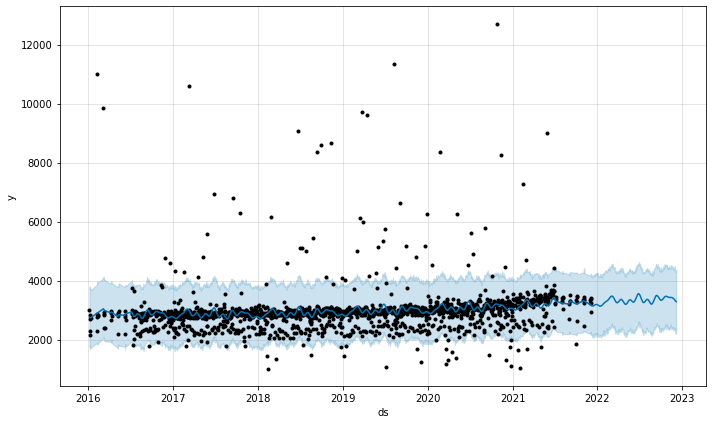

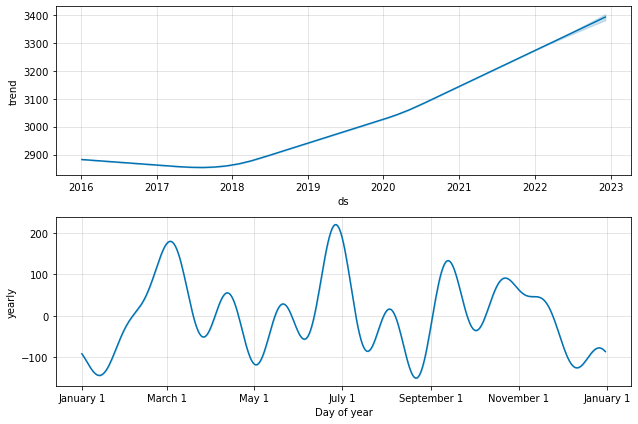

In [111]:
data_apt = prix_m2_france[prix_m2_france['Type local'] == "Appartement"]
data_apt = data_apt.rename(columns={"Prix m2": 'y'})

print(data_apt.shape)

m = Prophet(daily_seasonality=False,weekly_seasonality= False)
m.fit(data_apt)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)

Entre 2016 et 2018, lègère diminution du prix au m2 pour les appartements (France entière).

Depuis 2016, 3% par an.

### 3 - Prévisions concernant  Paris

(1862, 4)


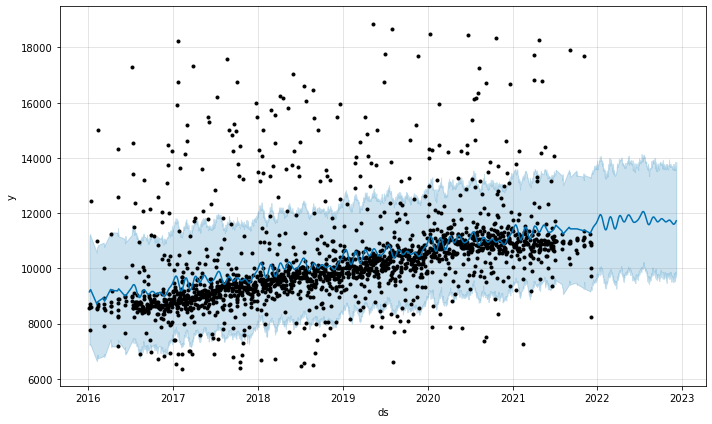

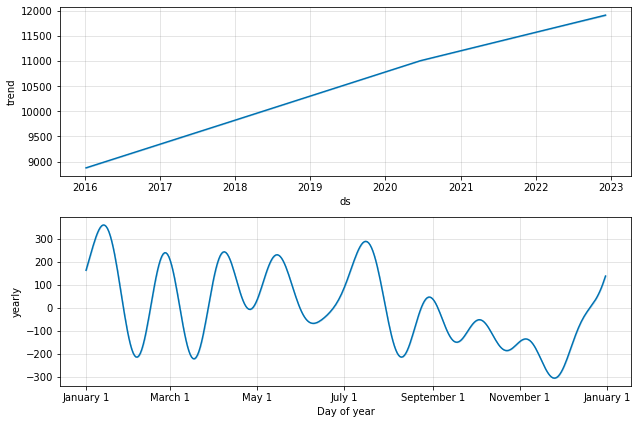

In [25]:
data_paris = prix_m2_dep[(prix_m2_dep['Code departement'] == 75) ]
data_paris = data_paris.rename(columns={"Prix m2": 'y'})

print(data_paris.shape)

m = Prophet(daily_seasonality=False,weekly_seasonality= False)
m.fit(data_paris)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)


Environ 4,15% d'augmentation par an pour Paris.
A noter léger ralentissement depuis mi-2020.

### 4 -  Evolution des prix par catégories :  les 10% des prix les plus chers


2996.8279569892475
(347, 3)


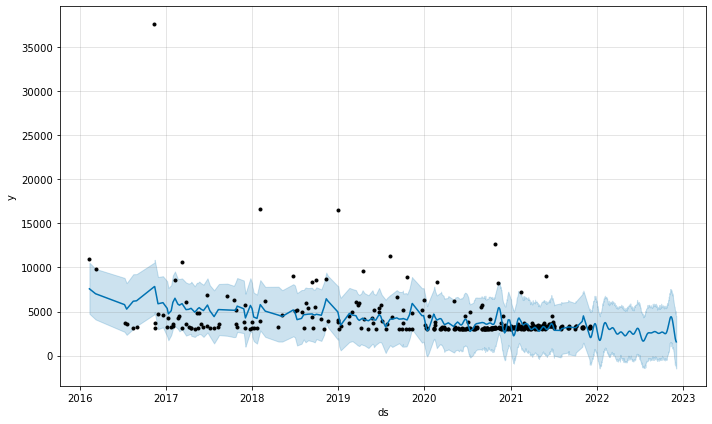

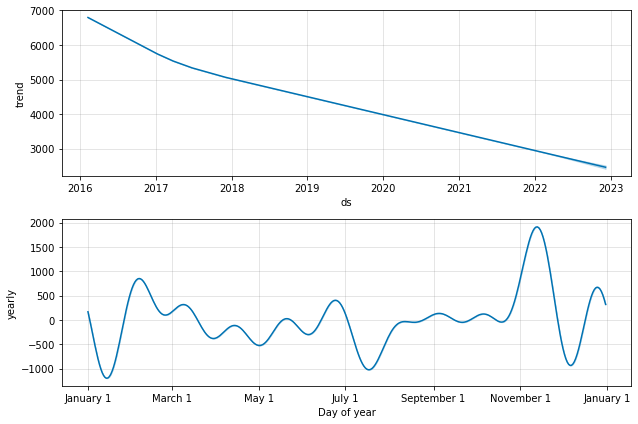

In [22]:
data_les_plus_hautes = prix_m2_france["Prix m2"].quantile(0.90)
print(data_les_plus_hautes)
data_paris_10_les_plus_haut = prix_m2_france[(prix_m2_france['Prix m2'] > data_les_plus_hautes) ]
data_paris_10_les_plus_haut = data_paris_10_les_plus_haut.rename(columns={"Prix m2": 'y'})

print(data_paris_10_les_plus_haut.shape)

m = Prophet(daily_seasonality=False,weekly_seasonality= False)
m.fit(data_paris_10_les_plus_haut)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)


1570.02457002457
(347, 3)


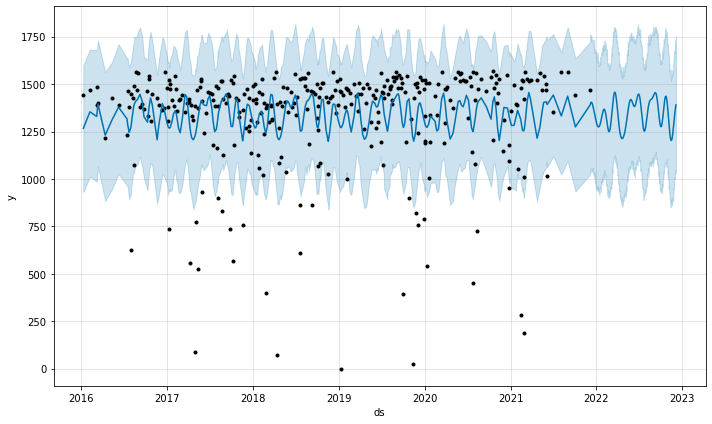

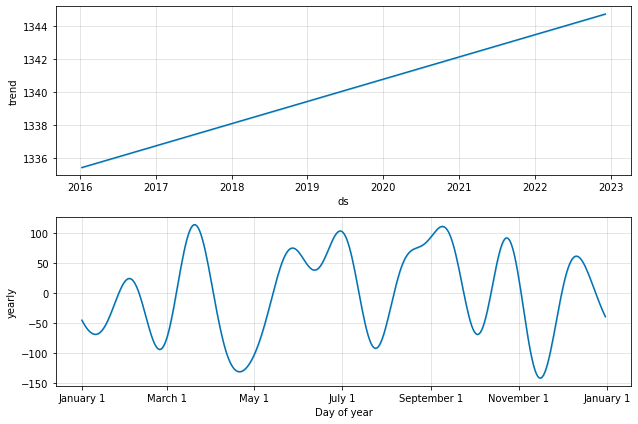

In [28]:
data_les_plus_bas = prix_m2_france["Prix m2"].quantile(0.1)
print(data_les_plus_bas)
data_paris_10_les_plus_bas = prix_m2_france[(prix_m2_france['Prix m2'] < data_les_plus_bas) ]
data_paris_10_les_plus_bas = data_paris_10_les_plus_bas.rename(columns={"Prix m2": 'y'})

print(data_paris_10_les_plus_bas.shape)

m = Prophet(daily_seasonality=False,weekly_seasonality= False)
m.fit(data_paris_10_les_plus_bas)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

fig2 = m.plot_components(forecast)

#print(forecast)

Interprétation : il est très difficile de trouver des similarités, les tendances évoluent de façon assez hétérogènes selon les catégories de biens.

### 5 - Autres visualisations concernant les évolutions de prix

In [17]:
import seaborn as sns
df_clean["year"] = pd.to_datetime(df_clean['Date mutation']).dt.to_period('Y')

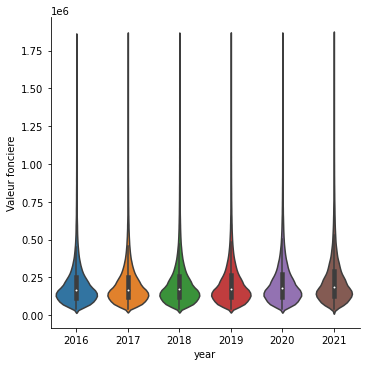

In [21]:
sns.catplot(x="year",y="Valeur fonciere", kind='violin',data = df_clean );

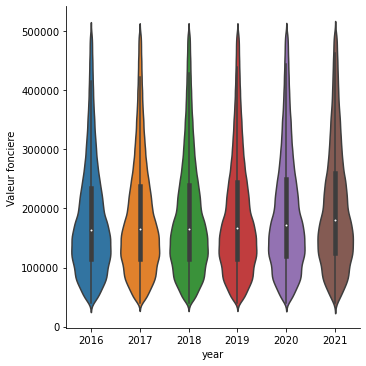

In [25]:
sns.catplot(x="year",y="Valeur fonciere", kind='violin',data = df_clean[df_clean["Valeur fonciere"]< 500000] );

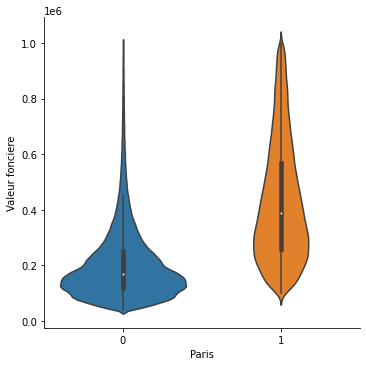

In [35]:
sns.catplot(x="Paris",y="Valeur fonciere", kind='violin',data = df_clean[df_clean["Valeur fonciere"]< 1000000]);